In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from scipy.stats import norm

In [81]:
data = pd.read_csv('Dataset/amazon_final.csv')

In [82]:
data

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company
0,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.0,1,589,999,Marutivilla
1,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,3.2,4,688,1500,Clovia
2,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,10,1249990,1594900,Samsung
3,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,accessories,Jewellery,-1.0,0,406009,1200000,USPTO
4,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,stores,Men's Fashion,-1.0,0,406009,1200000,USPTO
...,...,...,...,...,...,...,...,...
527534,"BRU Instant Coffee Sachet,Ground, 8g",grocery & gourmet foods,"Coffee, Tea & Beverages",4.0,7,8,10,BRU
527535,Foam Bag,accessories,Bags & Luggage,4.0,1,0,4,Foam
527536,Learning The Basics Of Home Theater,"tv, audio & cameras",Home Audio & Theater,3.8,21,0,0,Learning
527537,The Sugar Men,stores,Men's Fashion,4.3,4485,0,0,The


In [83]:
data = data[data["ratings"]!=-1]

In [84]:
data.count()

name              362797
main_category     362797
sub_category      362797
ratings           362797
no_of_ratings     362797
discount_price    362797
actual_price      362797
company           362797
dtype: int64

In [85]:
data["discount_percentage"] = ((data["discount_price"] / data["actual_price"])*100)

C:\Users\Harshil\AppData\Local\Temp\ipykernel_4020\789037876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["discount_percentage"] = ((data["discount_price"] / data["actual_price"])*100)


In [86]:
data["discount_percentage"] = data["discount_percentage"].round(2)


C:\Users\Harshil\AppData\Local\Temp\ipykernel_4020\2672747690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["discount_percentage"] = data["discount_percentage"].round(2)


In [87]:
data

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage
0,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.0,1,589,999,Marutivilla,58.96
1,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,3.2,4,688,1500,Clovia,45.87
2,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.0,10,1249990,1594900,Samsung,78.37
12,Sri Jagdamba Pearls 10 Gm 24kt (999) Yellow Go...,accessories,Gold & Diamond Jewellery,4.4,4,66305,700300,Sri,9.47
13,Sony Bravia 195 cm (77 inches) XR Series 4K Ul...,"tv, audio & cameras",Televisions,4.7,439,455990,699900,Sony,65.15
...,...,...,...,...,...,...,...,...,...
527534,"BRU Instant Coffee Sachet,Ground, 8g",grocery & gourmet foods,"Coffee, Tea & Beverages",4.0,7,8,10,BRU,80.00
527535,Foam Bag,accessories,Bags & Luggage,4.0,1,0,4,Foam,0.00
527536,Learning The Basics Of Home Theater,"tv, audio & cameras",Home Audio & Theater,3.8,21,0,0,Learning,NaN
527537,The Sugar Men,stores,Men's Fashion,4.3,4485,0,0,The,NaN


In [88]:
grouped_category = data.groupby(by="main_category")

In [89]:
lowest_rated_category = grouped_category["ratings"].mean().round(2).idxmin()

In [90]:
lowest_rated_category

'home, kitchen, pets'

In [91]:
mean_of_all_category = grouped_category[["ratings"]].mean().round(2)

In [92]:
mean_of_all_category

,ratings
main_category,
accessories,3.90
appliances,3.84
bags & luggage,3.94
beauty & health,4.00
car & motorbike,3.73
grocery & gourmet foods,4.07
home & kitchen,3.98
"home, kitchen, pets",3.22
industrial supplies,3.84


In [93]:
mean = mean_of_all_category["ratings"].mean()


In [94]:
mean_of_all_category = mean_of_all_category.reset_index()

In [95]:
mean_of_all_category

,main_category,ratings
0,accessories,3.90
1,appliances,3.84
2,bags & luggage,3.94
3,beauty & health,4.00
4,car & motorbike,3.73
5,grocery & gourmet foods,4.07
6,home & kitchen,3.98
7,"home, kitchen, pets",3.22
8,industrial supplies,3.84
9,kids' fashion,3.86


In [96]:
low_rated = mean_of_all_category[mean_of_all_category["ratings"]<mean]["main_category"]

In [97]:
data_of_all_lowest_rated_category = data[data["main_category"]==lowest_rated_category]

In [98]:
final_rating = data_of_all_lowest_rated_category["ratings"]

In [99]:
final_rating

45751     3.9
51086     3.5
62766     2.7
84385     4.5
95259     5.0
111025    4.1
111237    3.4
114800    1.0
122606    2.8
127061    2.9
144872    2.0
151623    3.0
270376    3.1
Name: ratings, dtype: float64

<Axes: xlabel='ratings', ylabel='discount_percentage'>

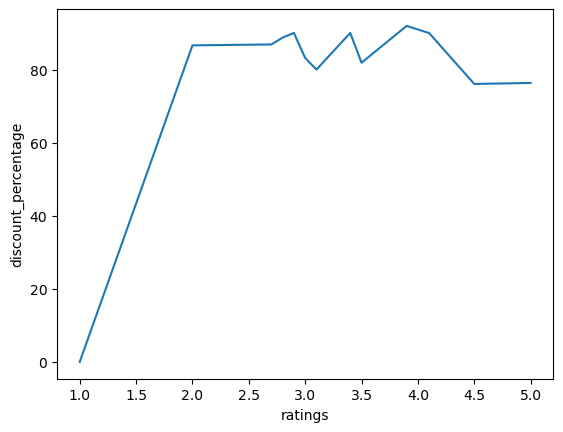

In [100]:
snb.lineplot(data=data_of_all_lowest_rated_category,x=data_of_all_lowest_rated_category["ratings"],y=data_of_all_lowest_rated_category["discount_percentage"])

In [101]:
# H0: Discount Percentage and Ratings are not significant of eachother for lowest category.
# Ha: Discount Percentage and Ratings are significant of eachother for lowest category.
# Alpha = 0.05

In [102]:
from scipy.stats import ttest_rel

In [103]:
alpha = 0.05
s,p = ttest_rel(data_of_all_lowest_rated_category["ratings"],data_of_all_lowest_rated_category["discount_percentage"])
print(p)
print(p<alpha) #True : We reject null hypothesis.

7.813415111474943e-08
True


In [104]:
low_category = data[data["ratings"]<3]

In [105]:
low_category

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,company,discount_percentage
0,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.0,1,589,999,Marutivilla,58.96
30,LG 164 cm (65 inches) 4K Ultra HD Smart OLED T...,"tv, audio & cameras",Televisions,2.7,5,319990,399990,LG,80.00
72,Nikon Mirrorless Z7 II Body with 24-70mm Lens ...,"tv, audio & cameras",Cameras,2.0,1,273999,294995,Nikon,92.88
384,Nikon Digital Camera Z 5 Kit with NIKKOR Z 24-...,"tv, audio & cameras",Cameras,1.9,2,132103,164995,Nikon,80.06
509,LG 139.7 cm (55 Inches) 4K Ultra HD Smart LED ...,"tv, audio & cameras",Televisions,2.8,8,88499,149990,LG,59.00
...,...,...,...,...,...,...,...,...,...
527349,Insight Cosmetics Organic Liquid Sindoor(SND16-M),beauty & health,Make-up,2.1,5,0,50,Insight,0.00
527396,Abriitch Micro Short Actual 3.5 Amp Fast Charg...,"tv, audio & cameras",Home Entertainment Systems,2.0,2,0,49,Abriitch,0.00
527410,"UNIQUE Coca-Cola Diet Soft Drink, 300ml",grocery & gourmet foods,"Coffee, Tea & Beverages",1.0,2,39,40,UNIQUE,97.50
527469,Uno Minda MI-0044 Insulator CARBURETTOR for-He...,car & motorbike,All Car & Motorbike Products,2.6,2,0,33,Uno,0.00


# Coorelation Analysis

In [107]:
mean_of_all_category.reset_index()

,index,main_category,ratings
0,0,accessories,3.90
1,1,appliances,3.84
2,2,bags & luggage,3.94
3,3,beauty & health,4.00
4,4,car & motorbike,3.73
5,5,grocery & gourmet foods,4.07
6,6,home & kitchen,3.98
7,7,"home, kitchen, pets",3.22
8,8,industrial supplies,3.84
9,9,kids' fashion,3.86


In [108]:
mean_of_all_category_dp = grouped_category[["discount_percentage"]].mean().round(2)
mean_of_all_category_dp.reset_index()

,main_category,discount_percentage
0,accessories,40.14
1,appliances,58.07
2,bags & luggage,43.63
3,beauty & health,59.07
4,car & motorbike,49.23
5,grocery & gourmet foods,60.10
6,home & kitchen,49.52
7,"home, kitchen, pets",78.59
8,industrial supplies,53.79
9,kids' fashion,45.76


In [109]:
inner_join = pd.merge(mean_of_all_category, mean_of_all_category_dp, on='main_category', how='inner')

In [112]:
# H0: Discount Percentage and Ratings are not significant of eachother for all category.
# Ha: Discount Percentage and Ratings are significant of eachother for all category.
# Alpha = 0.05

In [113]:
s,p = ttest_rel(inner_join["ratings"],inner_join["discount_percentage"])
p<0.05

True

* Actual price VS Ratings of all categories

In [114]:
mean_of_all_category_price = grouped_category[["actual_price"]].mean().round(2)
mean_of_all_category_price.reset_index()

,main_category,actual_price
0,accessories,3184.24
1,appliances,7471.44
2,bags & luggage,3580.66
3,beauty & health,1043.19
4,car & motorbike,1735.81
5,grocery & gourmet foods,576.23
6,home & kitchen,1781.79
7,"home, kitchen, pets",4384.46
8,industrial supplies,3100.49
9,kids' fashion,1761.39


In [115]:
inner_join = pd.merge(mean_of_all_category, mean_of_all_category_price, on='main_category', how='inner')

<Axes: xlabel='ratings', ylabel='actual_price'>

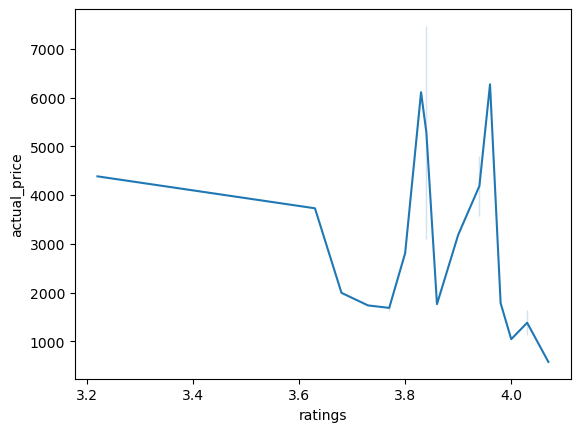

In [116]:
snb.lineplot(data=inner_join,x="ratings",y="actual_price")

The distribution of ratings appears to be somewhat symmetrical, with a peak around 3.8, suggesting that most ratings fall around this value.

It's difficult to say definitively whether the ratings are leaning positive or negative sentiment without any context about the rating scale. For instance, if the scale ranges from 1 (terrible) to 5 (excellent), then a rating of 3.8 would be closer to the positive side. 

In [120]:
# H0: Discount Percentage and Ratings are significant of eachother for all category.
# Ha: Discount Percentage and Ratings are not significant of eachother for all category.
# Alpha = 0.05

In [122]:
s,p = ttest_rel(inner_join["ratings"],inner_join["actual_price"])
p<0.05
p
#True : We reject null hypothesis.

1.1430743422571215e-06

* Actual price vs Rating

<Axes: xlabel='ratings', ylabel='actual_price'>

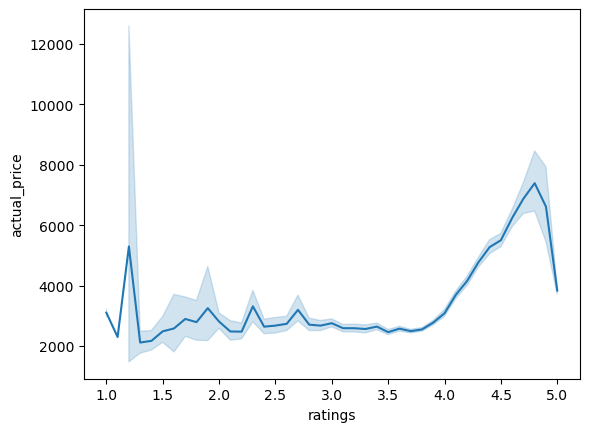

In [127]:
snb.lineplot(data=data,x="ratings",y="actual_price")

Products/services with very low ratings (around 1.0) might sometimes be very expensive, possibly due to some outliers or special cases.

As ratings improve (up to 2.0 - 3.0), prices tend to stabilize and are relatively lower.

Beyond a certain point (around 4.0), as ratings continue to rise, the actual_price tends to increase significantly, indicating that higher-rated products/services are often more expensive.